## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
from sklearn import preprocessing
import scipy as sp
from sklearn.cluster import KMeans

## Data Prep

In [30]:
########### Reading Data set ############################################################
covid=pd.read_csv(r"C:\Users\TCCAKTURK\Desktop\Digital Masters\owid-covid-data.csv")

In [31]:
########### Data Type Tuning & filling N/A ############################################################
covid.Death.fillna(0,inplace=True)
covid.Death=covid.Death.astype("int")

covid.Case.fillna(0,inplace=True)
covid.Case=covid.Case.astype("int")

covid.GDP=pd.DataFrame(covid.GDP).astype("int64")
covid.Population=pd.DataFrame(covid.Population).astype("int64")

## Analyze the data

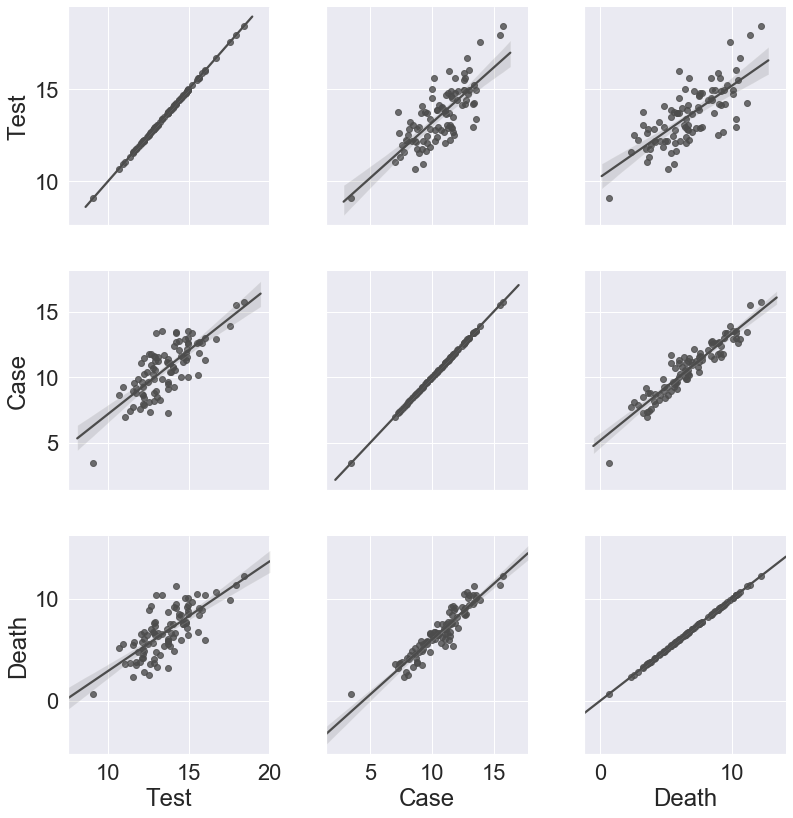

In [32]:
###### Test numbers & Case Correlation ###########################
covid_corr=covid.groupby("Country").max().reset_index().dropna()
covid_corr[["Test","Death","Case","GDP","Population"]]=np.log(covid_corr[["Test","Death","Case","GDP","Population"]])

g = sns.PairGrid(covid_corr, y_vars=["Test","Case","Death"], x_vars=["Test","Case","Death"], height=4)
g.map(sns.regplot, color=".3")

In [49]:
# Correlaiton coefficient btw metrics
covid.drop(["Population","Median_age","GDP"],axis=1).groupby("Country").max().reset_index().dropna().corr()

,Test,Case,Death
Test,1.000000,0.943618,0.876157
Case,0.943618,1.000000,0.911898
Death,0.876157,0.911898,1.000000


### As we can see above strong relation between Test-Case-Death numbers. So that means more test is more Coivd-19 related death

## Modelling the Death Numbers with Other metrics

In [44]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict


X=covid.drop(["Test","Median_age","Case","Death"],axis=1)
y=covid.Test


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)



lm = sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Test   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              86.60
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                    6.95e-20
Time:                        17:30:35   Log-Likelihood:                         -1244.4
No. Observations:                  74   AIC:                                      2493.
Df Residuals:                      72   BIC:                                      2497.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0421      0.003     12.643      0.000       0.035       0.049
GDP           35.0137     18.145      1.930      0.058      -1.158      71.185
==============================================================================
Omnibus:                      116.768   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4142.246
Skew:                           4.997   Prob(JB):                         0.00
Kurtosis:                      38.264   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Above Regression Model shows that Rich Countries can perform more test than others can do.